Import all necessary library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np; np.random.seed(0)
import warnings; warnings.simplefilter('ignore')
import math

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [4]:
loan_prime = pd.read_csv("loan/loan.csv")

In [5]:
loan = loan_prime.copy()

In [6]:
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

Observations made:
* Target coulmn is loan_status, which marks wheather an applicant is risky or not.
* Objective is to identify factors affecting applicants to be risky.
* 54 of the coulmns had NULL values, so dropping them.

In [7]:
loan.dropna(how='all',axis=1,inplace=True)

In [8]:
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,39717.0,39717,39717.0,39661.0,39717.0,39020.000000,39678.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,NaN,22.088828,NaN,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,NaN,11.401709,NaN,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,NaN,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,NaN,13.000000,NaN,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,NaN,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,NaN,20.0

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
100*(loan.isnull().sum().sort_values(ascending=False))/len(loan.index)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
collection_recovery_fee        0.000000
acc_now_delinq                 0.000000
application_type               0.000000
url                            0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
verification_status            0.000000
annual_inc                     0.000000
home_ownership                 0.000000
delinq_amnt                    0.000000


Cleaning **next pymnt_d**

In [11]:
loan[(loan.next_pymnt_d.isnull())].loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [12]:
loan[~(loan.next_pymnt_d.isnull())].loan_status.value_counts()

Current    1140
Name: loan_status, dtype: int64

In [13]:
loan[~(loan.next_pymnt_d.isnull())].next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

From above we infer that only loan status : **current** has next_pymnt_d.<br>
We can drop this coulmn as it will not be used in analysis.

Cleaning **mths_since_last_record**

In [14]:
loan[(loan.mths_since_last_record.isnull())].loan_status.value_counts()

Fully Paid     30788
Charged Off     5049
Current         1094
Name: loan_status, dtype: int64

We conclude to Drop **mths_since_last_record**, since there are many null values and<br> it is spread accross all values of loan status.

Cleaning **mths_since_last_delinq**

In [15]:
loan[(loan.mths_since_last_delinq.isnull())].loan_status.value_counts()

Fully Paid     21420
Charged Off     3485
Current          777
Name: loan_status, dtype: int64

We conclude to Drop **mths_since_last_delinq**, since there are many null values and<br> it is spread accross all values of loan status.

dropping **desc** as it is neither categorical nor numeric.<br>
A description can only tell intent of the loan and the applicant being risky or not. 

Dropping next_pymnt_d,mths_since_last_record, mths_since_last_delinq, desc.

In [16]:
loan.drop(["next_pymnt_d",'mths_since_last_record','mths_since_last_delinq','desc'],axis=1,inplace=True)

Analysing loan status:

Since we are to identify risky applicants, applicants which are current does not infer any conclusion.<br>
Hence, we can drop the rows with **current** loan status as well

In [17]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [18]:
loan = loan[loan.loan_status != "Current"]

In [19]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [20]:
100*(loan.isnull().sum().sort_values(ascending=False))/len(loan.index)

emp_title                     6.185033
emp_length                    2.677761
pub_rec_bankruptcies          1.806776
last_pymnt_d                  0.184047
collections_12_mths_ex_med    0.145164
chargeoff_within_12_mths      0.145164
revol_util                    0.129611
tax_liens                     0.101097
title                         0.028514
last_credit_pull_d            0.005184
annual_inc                    0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
sub_grade                     0.000000
home_ownership                0.000000
addr_state                    0.000000
grade                         0.000000
installment                   0.000000
int_rate                      0.000000
term                          0.000000
funded_amnt_inv               0.000000
funded_amnt              

In [21]:
loan[loan.total_rec_late_fee!=0].loan_status.value_counts()

Fully Paid     1132
Charged Off     863
Name: loan_status, dtype: int64

Cleaning emp_title

In [22]:
loan.emp_title.describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

In [23]:
loan.emp_title.value_counts()

US Army                          131
Bank of America                  107
IBM                               65
AT&T                              57
Kaiser Permanente                 56
                                ... 
University Of Utah Hospital        1
Felixs Fish Camp                   1
Harris Lighting                    1
Modern Woodmen of America          1
Courtney Thurman (Consultant)      1
Name: emp_title, Length: 28027, dtype: int64

Since the frequency of "US Army" is very small compared to number of unique values.<br>
We will drop the null value rows.

In [24]:
loan = loan[~(loan.emp_title.isnull())]

As total of missing values in all coulmns is < 5%, hence dropping all the missing values.

In [25]:
condition = ((loan.pub_rec_bankruptcies.isnull()) | 
             (loan.last_pymnt_d.isnull()) |
             (loan.emp_length.isnull()) | 
             (loan.chargeoff_within_12_mths.isnull()) |
             (loan.collections_12_mths_ex_med.isnull()) | 
             (loan.revol_util.isnull()) |
             (loan.tax_liens.isnull()) | 
             (loan.title.isnull()))

In [26]:
loan = loan[(~condition)]

In [27]:
loan.tax_liens.value_counts()

0.0    35365
Name: tax_liens, dtype: int64

As Tax liens has only 0, value, it can be dropped

In [28]:
loan.drop("tax_liens",axis=1,inplace=True)

In [29]:
loan[loan.loan_status == "Charged Off"].recoveries

1         117.08
9         269.29
12        444.30
14        645.10
21          0.00
          ...   
39251     426.43
39291       0.00
39362      48.17
39425     151.20
39623    1909.87
Name: recoveries, Length: 4942, dtype: float64

Drop Zip code as it contains only partia

In [30]:

loan.purpose.value_counts()

debt_consolidation    16909
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [31]:
# New categorical variable binning them
loan.dti.value_counts()

0.00     140
12.00     39
18.00     38
19.20     37
13.20     36
        ... 
29.02      1
28.54      1
28.50      1
25.77      1
26.78      1
Name: dti, Length: 2842, dtype: int64

In [32]:
#Separate numeric and categorical variables
n_loan = loan.select_dtypes(include=[np.number])
c_loan = loan.select_dtypes(exclude=[np.number])

In [33]:
loan.policy_code.value_counts()

1    35365
Name: policy_code, dtype: int64

In [34]:
n_loan.nunique()

id                            35365
member_id                     35365
loan_amnt                       847
funded_amnt                    1001
funded_amnt_inv                7324
installment                   14026
annual_inc                     4830
dti                            2842
delinq_2yrs                      11
inq_last_6mths                    9
open_acc                         38
pub_rec                           5
revol_bal                     20351
total_acc                        79
out_prncp                         1
out_prncp_inv                     1
total_pymnt                   33738
total_pymnt_inv               33464
total_rec_prncp                6192
total_rec_int                 31468
total_rec_late_fee             1163
recoveries                     3584
collection_recovery_fee        2386
last_pymnt_amnt               31984
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths    

In [35]:
c_loan.describe()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365
unique,2,333,7,35,27412,11,4,3,51,2,1,35365,14,17660,804,48,509,1081,1,97,96,1
top,36 months,10.99%,B,A4,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,Oct-99,0%,f,Mar-13,May-16,INDIVIDUAL
freq,26375,862,10718,2662,128,8028,17065,14838,1917,30423,35365,1,16909,1975,526,6396,342,832,35365,967,8718,35365


Based on frequency observed above, dropping the following.
* out_prncp
* out_prncp_inv
* collections_12_mths_ex_med
* policy_code
* acc_now_delinq
* chargeoff_within_12_mths
* delinq_amnt 
* pymnt_plan
* initial_list_status
* application_type

Also, dropping following, as they do not assist in investigation.
* url
* zip_code

In [36]:
drop_list = ["out_prncp",
             'out_prncp_inv',
             'collections_12_mths_ex_med',
             'policy_code',
             'acc_now_delinq',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'pymnt_plan',
             'initial_list_status',
             'application_type', 
             'url',
             'zip_code']

In [37]:
loan.drop(drop_list,axis=1,inplace=True)

In [38]:
loan.shape

(35365, 40)

In [39]:
#Separate numeric and categorical variables, from updated loan data frame.
n_loan = loan.select_dtypes(include=[np.number])
c_loan = loan.select_dtypes(exclude=[np.number])

In [40]:
n_loan_corr = n_loan.drop(['id','member_id'],axis=1,inplace=False)

In [41]:
correlation = n_loan_corr.corr()
correlation

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981570,0.951897,0.930741,0.258983,0.063067,-0.035296,0.010001,0.174216,-0.046905,0.319774,0.255733,0.884288,0.860239,0.848791,0.728812,0.046661,0.143544,0.079358,0.477648,-0.030381
funded_amnt,0.981570,1.000000,0.971349,0.956773,0.254825,0.063373,-0.035390,0.010272,0.172782,-0.047559,0.312439,0.249979,0.901399,0.878168,0.867281,0.737618,0.048843,0.143871,0.081014,0.481655,-0.031635
funded_amnt_inv,0.951897,0.971349,1.000000,0.922849,0.245854,0.066670,-0.039412,-0.000302,0.162768,-0.051510,0.295483,0.241116,0.887206,0.908955,0.852175,0.731983,0.035492,0.135562,0.070492,0.472691,-0.036645
installment,0.930741,0.956773,0.922849,1.000000,0.256470,0.054147,-0.023823,0.008246,0.170735,-0.042818,0.316643,0.230248,0.860483,0.833471,0.850762,0.642499,0.055997,0.120870,0.078922,0.414850,-0.028591
annual_inc,0.258983,0.254825,0.245854,0.256470,1.000000,-0.120870,0.022564,0.033739,0.155106,-0.013701,0.272333,0.234623,0.247433,0.239355,0.247356,0.180302,0.006891,0.022859,0.017354,0.138654,-0.010815
dti,0.063067,0.063373,0.066670,0.054147,-0.120870,1.000000,-0.035743,0.003772,0.290384,-0.005826,0.228566,0.227296,0.059159,0.062157,0.036703,0.102421,-0.009013,0.025885,0.011436,0.007827,0.006457
delinq_2yrs,-0.035296,-0.035390,-0.039412,-0.023823,0.022564,-0.035743,1.000000,0.008124,0.010860,0.011456,-0.055611,0.067267,-0.025698,-0.030167,-0.041021,0.021570,0.027625,0.012020,0.014733,-0.012474,0.005608
inq_last_6mths,0.010001,0.010272,-0.000302,0.008246,0.033739,0.003772,0.008124,1.000000,0.094131,0.022393,-0.024374,0.114890,-0.008551,-0.016221,-0.021649,0.026078,0.031217,0.018833,0.013783,0.029462,0.013907
open_acc,0.174216,0.172782,0.162768,0.170735,0.155106,0.290384,0.010860,0.094131,1.000000,0.004052,0.285299,0.684513,0.158352,0.150513,0.156103,0.120162,-0.016904,0.020475,0.011513,0.082485,0.010357
pub_rec,-0.046905,-0.047559,-0.051510,-0.042818,-0.013701,-0.005826,0.011456,0.022393,0.004052,1.000000,-0.058503,-0.019414,-0.049634,-0.052341,-0.061356,-0.001661,-0.004016,-0.006053,-0.006186,-0.031914,0.839635


In [42]:
n_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [43]:
c_loan.describe()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
count,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365
unique,2,333,7,35,27412,11,4,3,51,2,14,17660,48,509,1081,97,96
top,36 months,10.99%,B,A4,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,CA,Oct-99,0%,Mar-13,May-16
freq,26375,862,10718,2662,128,8028,17065,14838,1917,30423,16909,1975,6396,342,832,967,8718


In [44]:
c_loan.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'earliest_cr_line', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

<AxesSubplot:>

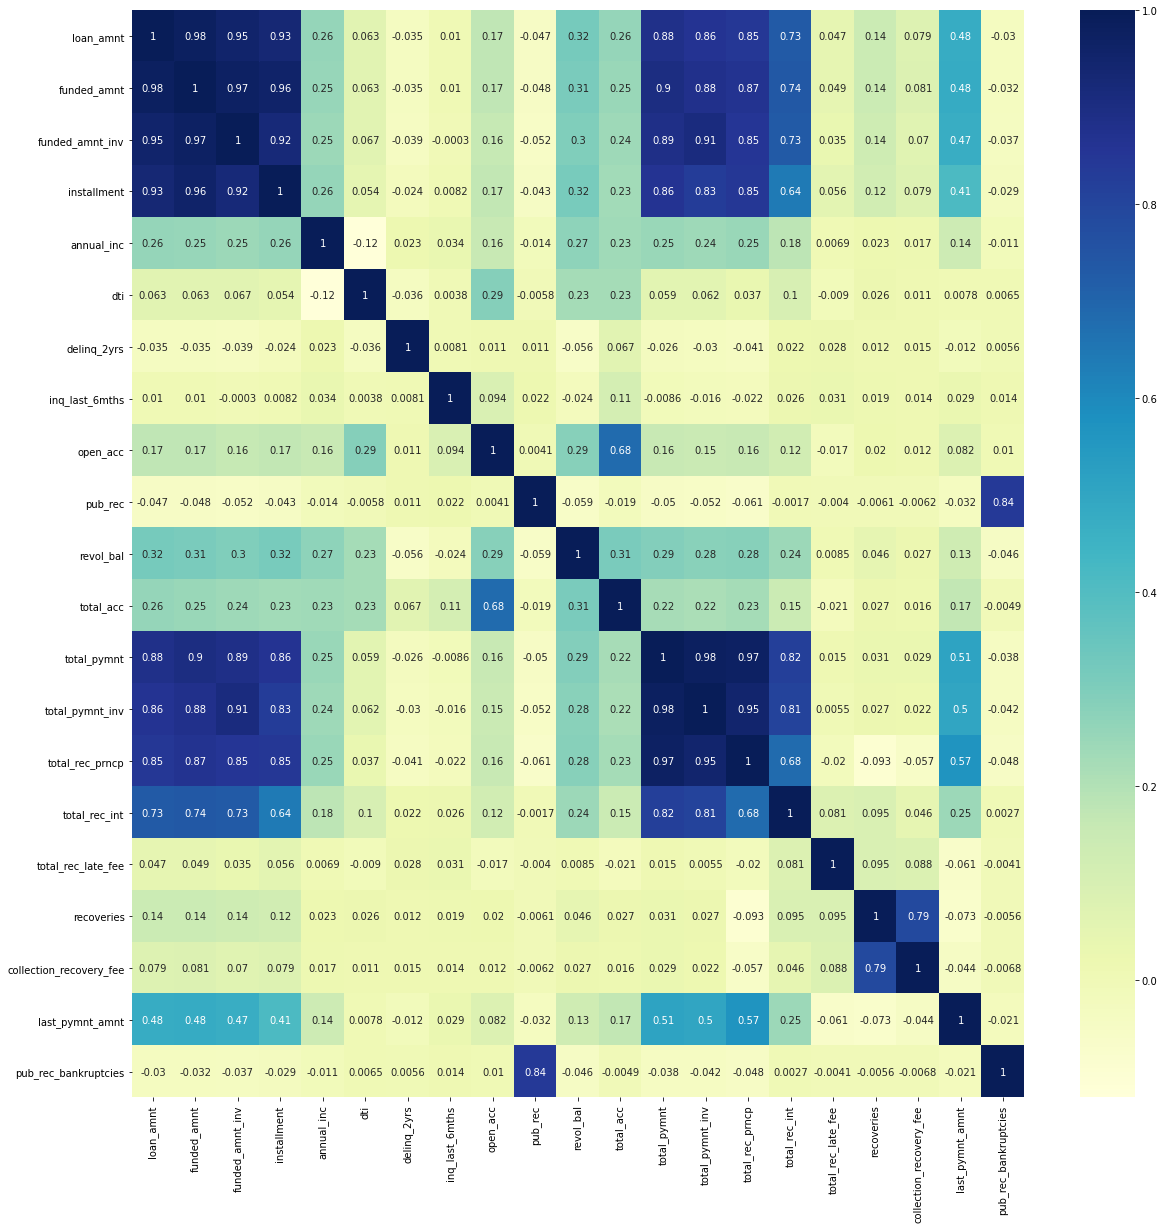

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.index,
            annot=True,
            cmap="YlGnBu")

From above we see that there is strong corelation between.
* loan_amnt
* funded_amnt
* funded_amnt_inv
* installment
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int

Categorical Value Analysis

<AxesSubplot:xlabel='grade'>

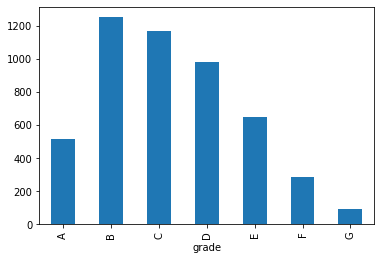

In [46]:
# NUmber of "Charged Off" laon
c_loan[c_loan.loan_status=="Charged Off"].groupby('grade').loan_status.count().plot.bar()

In [47]:
#% Ratio of "Charged off" loan to number of loans approved in the group.
chargeOff_ratio = (100*(c_loan[c_loan.loan_status=="Charged Off"].groupby('grade').loan_status.count())/(c_loan.groupby('grade').loan_status.count()))

In [48]:
chargeOff_ratio = (100*(c_loan[c_loan.loan_status=="Charged Off"].groupby('grade').loan_status.count())/(c_loan.groupby('grade').loan_status.count()))

In [49]:
#sns.set_context('poster')

In [50]:
chargeOff_ratio

grade
A     5.612691
B    11.690614
C    16.281337
D    21.021021
E    26.118501
F    31.707317
G    32.978723
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='grade'>

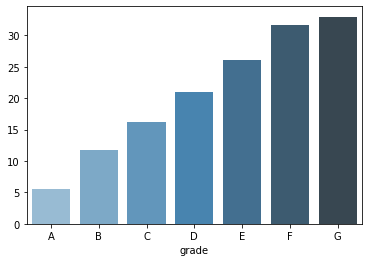

In [51]:
sns.barplot(x=chargeOff_ratio.index,y=chargeOff_ratio.values, palette="Blues_d")

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

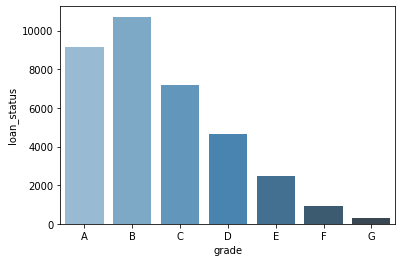

In [52]:
# Group-wise total approved loans.
sns.barplot(x=chargeOff_ratio.index ,y=c_loan.groupby('grade').loan_status.count(),palette="Blues_d")

We make an obervation that,
1. Number of **"Charged off"** loans are highest in Grade B, but number of loan is also highest in Grade B.<br>
2. The ratio of Charged off loans to total loans in a group is **Highest** for group G.

This makes group riskier of all the groups.

* Grades **D,E,F,G** are have cahrged off loans > 20%.

In [53]:
c_loan['emp_years'] = c_loan.emp_length.apply(lambda x: x.split(" ")[0])

In [54]:
c_loan.emp_years.values

array(['<', '10+', '3', ..., '2', '1', '8'], dtype=object)

In [55]:
c_loan.emp_years.value_counts()

10+    8028
2      4081
<      3978
3      3833
4      3206
5      3043
1      2959
6      2062
7      1638
8      1361
9      1176
Name: emp_years, dtype: int64

<AxesSubplot:>

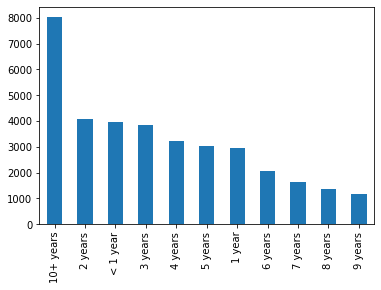

In [56]:
c_loan.emp_length.value_counts().plot.bar()

POST SESSION

In [57]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


Changing Target Variable loan_status to numeric categorical variale.

In [58]:
loan.loan_status = loan.loan_status.apply(lambda x : 1 if x=="Charged Off" else 0)

Debt Ratio of complete dataset

In [59]:
#Debt ratio on all data
net_debt_ratio = round(100*loan.loan_status.sum()/len(loan.loan_status),2)
net_debt_ratio

13.97

From the data we see that about ~14% of the loans is being charged off from the total loans disbursed.

In [60]:
loan.describe(include=np.object)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
count,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365,35365
unique,2,333,7,35,27412,11,4,3,51,14,17660,48,509,1081,97,96
top,36 months,10.99%,B,A4,US Army,10+ years,RENT,Not Verified,Dec-11,debt_consolidation,Debt Consolidation,CA,Oct-99,0%,Mar-13,May-16
freq,26375,862,10718,2662,128,8028,17065,14838,1917,16909,1975,6396,342,832,967,8718


As the corelation is high between:
* loan_amnt
* funded_amnt
* funded_amnt_inv
* installment
Using loan_amnt as representative of these parameters : **funded_amnt**, **funded_amnt_inv**, **installment**.

Following are Customer behaviour parameteres.
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* issue_d
* title
* earliest_cr_line	
* revol_util	
* last_pymnt_d	
* last_credit_pull_d
also, drop following, as they are applicant behaviour attributes
* pub_rec_bankruptcies
* last_pymnt_amnt
* collection_recovery_fee
* recoveries
* total_rec_late_fee
* revol_bal
* pub_rec
* delinq_2yrs
* inq_last_6mths
* open_acc


Dropping them.


In [61]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,0,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [62]:
drop_list = ["funded_amnt", 
             "funded_amnt_inv", 
             "installment", 
             "total_pymnt", 
             "total_pymnt_inv", 
             "total_rec_prncp", 
             "total_rec_int", 
             "issue_d", 
             "title",
             "earliest_cr_line", 
             "revol_util", 
             "last_pymnt_d", 
             "last_credit_pull_d",
             "member_id", "pub_rec_bankruptcies",
             "last_pymnt_amnt",
             "collection_recovery_fee",
             "recoveries", 
             "total_rec_late_fee",
             "revol_bal",
             "pub_rec",
             "delinq_2yrs",
             "inq_last_6mths", 
             "open_acc"]


In [63]:
loan.drop(drop_list,axis=1,inplace=True)

In [64]:
loan.shape

(35365, 16)

Analysing **pupose.**

We try to get risk ratio of purpose.

In [65]:
# Charged off values.
loan.groupby('purpose').loan_status.sum().sort_values(ascending=False)#/loan.purpose.value_counts()


purpose
debt_consolidation    2508
other                  546
credit_card            479
small_business         356
home_improvement       296
major_purchase         190
car                    149
medical                 95
wedding                 83
moving                  79
house                   52
vacation                49
educational             45
renewable_energy        15
Name: loan_status, dtype: int64

Risk Ratio of purpose.

In [66]:
purpose_risk = 100*(loan.groupby('purpose').loan_status.sum().sort_values(ascending=False)/loan.purpose.value_counts()).sort_values(ascending=False)

In [67]:
purpose_risk

small_business        26.350851
renewable_energy      17.241379
educational           16.304348
other                 15.771231
house                 15.757576
medical               15.273312
moving                15.105163
debt_consolidation    14.832338
vacation              14.759036
home_improvement      11.323642
car                   10.681004
credit_card           10.354518
major_purchase         9.630005
wedding                9.595376
dtype: float64

<AxesSubplot:>

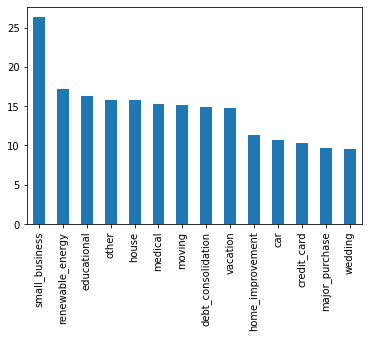

In [68]:
purpose_risk.plot.bar()

<AxesSubplot:ylabel='Density'>

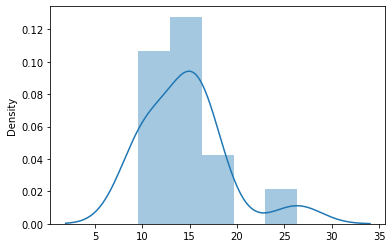

In [69]:
sns.distplot(a=purpose_risk)

From above we can see that small business has a small loan applicartion percentage, but higher Default ratio of 26%.
And wedding has minimum risk in purpose category

Risk Score FOrmula is taken as:

round(100*(max_val - min_val)/max_val)/max_val,2)

This will give the sense of variation betwwen maximum and minimum value.

In [70]:
purpose_risk_score = round(100*(purpose_risk.max() - purpose_risk.min())/purpose_risk.max(),2)
purpose_risk_score

63.59

Analysing Interest Rate

In [71]:
loan.int_rate

1        15.27%
3        13.49%
5         7.90%
6        15.96%
7        18.64%
          ...  
39433     9.83%
39475     9.01%
39551    10.91%
39562    10.28%
39623    12.49%
Name: int_rate, Length: 35365, dtype: object

In [72]:
#loan["int_rate_test"] = pd.Series(list(map(lambda x : round(float(x.split('%')[0]),2),loan.int_rate)))

In [73]:
loan["int_rate"] = loan.int_rate.apply(lambda x: float(x[:-1]))

In [74]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,total_acc
1,1077430,2500,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,1,car,GA,1.00,4
3,1076863,10000,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,0,other,CA,20.00,37
5,1075269,5000,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,0,wedding,AZ,11.20,12
6,1069639,7000,60 months,15.96,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,0,debt_consolidation,NC,23.51,11
7,1072053,3000,36 months,18.64,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,0,car,CA,5.35,4


In [75]:
#Getting rate of interest stats.
loan.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [76]:
# Giving categorical value to range of interest rates. Binning for analysis, as there are a lot of unique values

def int_rate_convert(x):
    if x < 12:
        return "low"
    if ((x >= 12) and (x<=18)):
        return "medium"
    if x>18:
        return "high"

In [77]:
loan.int_rate = loan.int_rate.apply(int_rate_convert)

In [78]:
int_rate_risk = 100*(loan.groupby('int_rate').loan_status.sum().sort_values(ascending=False)/loan.int_rate.value_counts()).sort_values(ascending=False)

In [79]:
int_rate_risk

high      32.000000
medium    18.224844
low        8.632131
dtype: float64

<AxesSubplot:>

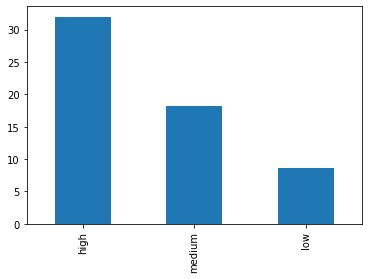

In [80]:
int_rate_risk.plot.bar()

In [81]:
int_rate_risk_score = round(100*(int_rate_risk.max() - int_rate_risk.min())/int_rate_risk.max(),2)
int_rate_risk_score

73.02

Analysing Loan Amount

In [82]:
loan.loan_amnt.describe()

count    35365.000000
mean     11133.179697
std       7326.276639
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

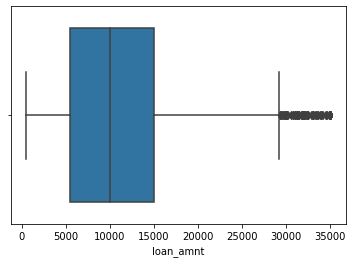

In [83]:
sns.boxplot(loan.loan_amnt)

Binning Loan amount in following range:
* 0 - 10k               : Low
* 10k - 20k             : Medium
* greater than 20k      : High

In [84]:
def loan_amt_convert(x):
    if x < 10000 :
        return "low"
    if ((x >= 10000) and (x<=20000)):
        return "medium"
    if x>20000:
        return "high"

In [85]:
loan.loan_amnt = loan.loan_amnt.apply(loan_amt_convert)

In [86]:
loan.loan_amnt.value_counts()

low       17592
medium    13845
high       3928
Name: loan_amnt, dtype: int64

In [87]:
loan_amnt_risk = 100*(loan.groupby('loan_amnt').loan_status.sum().sort_values(ascending=False)/loan.loan_amnt.value_counts()).sort_values(ascending=False)

In [88]:
loan_amnt_risk

loan_amnt
high      19.653768
medium    14.091730
low       12.613688
dtype: float64

We can see that higher loan amount have higher risk of being "Charged Off".
However 

In [89]:
loan_amnt_risk_score = round(100*(loan_amnt_risk.max() - loan_amnt_risk.min())/loan_amnt_risk.max(),2)
loan_amnt_risk_score

35.82

Analysing term

In [90]:
loan.term.describe()

count          35365
unique             2
top        36 months
freq           26375
Name: term, dtype: object

<AxesSubplot:>

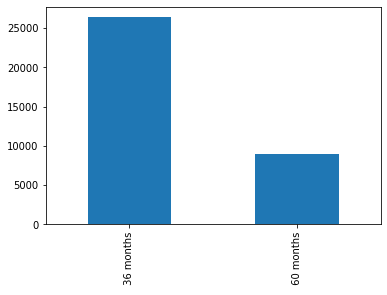

In [91]:
loan.term.value_counts().plot.bar()

In [92]:
loan_term_risk = 100*(loan.groupby('term').loan_status.sum().sort_values(ascending=False)/loan.term.value_counts()).sort_values(ascending=False)

In [93]:
loan_term_risk

term
 60 months    24.616240
 36 months    10.346919
dtype: float64

In [94]:
loan_term_risk_score = round(100*(loan_term_risk.max() -loan_term_risk.min())/loan_term_risk.max(),2)
loan_term_risk_score

57.97

<AxesSubplot:xlabel='term'>

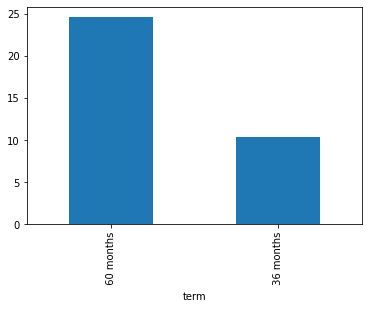

In [95]:
loan_term_risk.plot.bar()

Analysing term Grade and sub-grade

In [96]:
loan.grade.describe()

count     35365
unique        7
top           B
freq      10718
Name: grade, dtype: object

In [97]:
grade_grp = loan.groupby(['grade','sub_grade'])

In [98]:
grade_risk = 100*(grade_grp.loan_status.sum()/grade_grp.loan_status.count())

<AxesSubplot:xlabel='grade,sub_grade'>

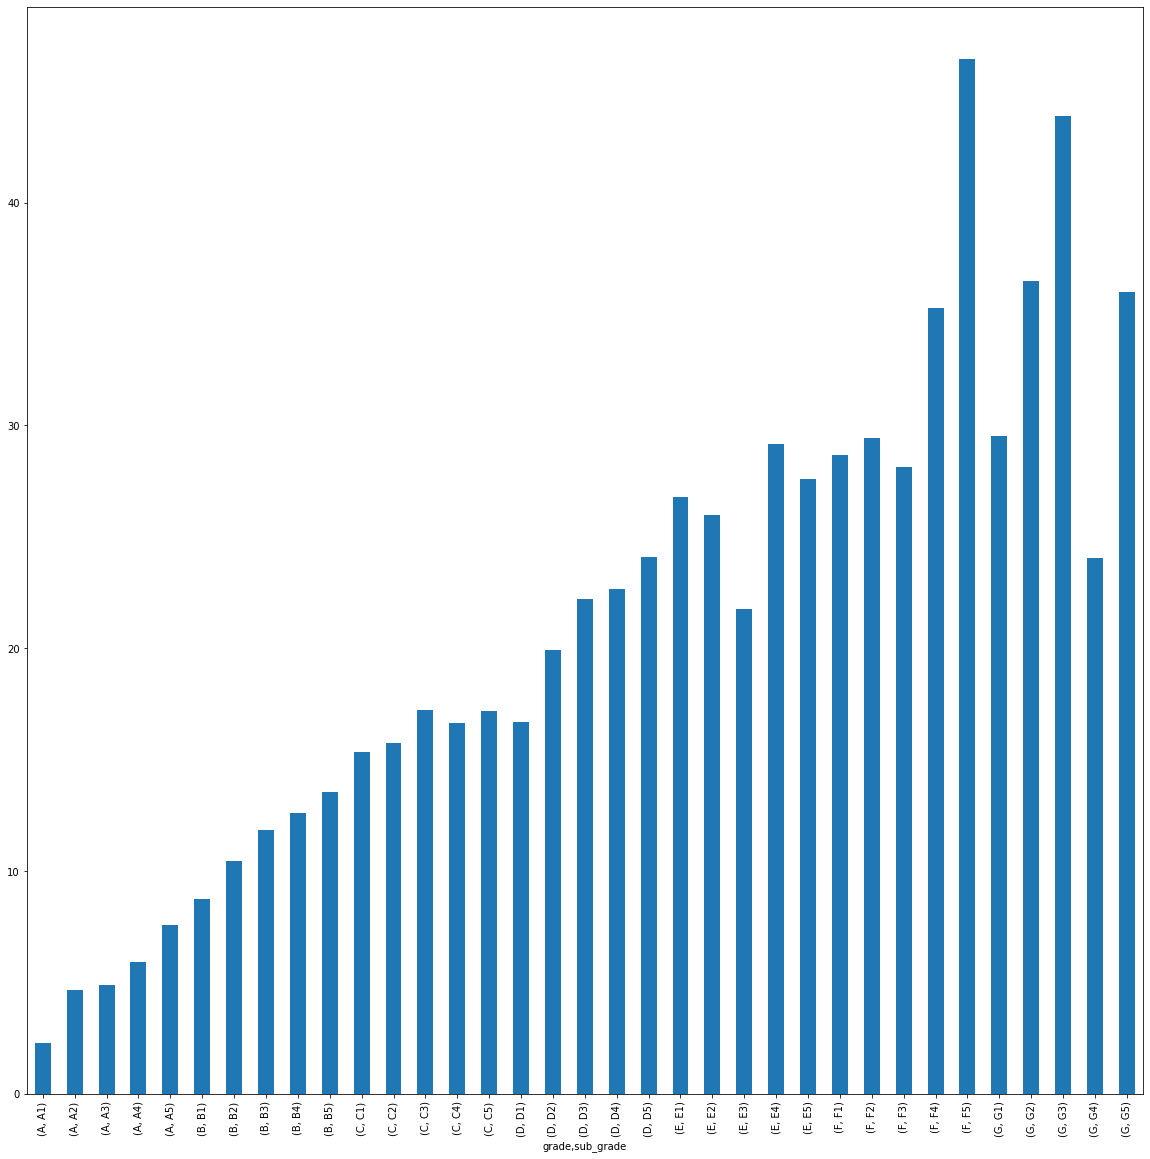

In [99]:
grade_risk.plot.bar(figsize=(20,20))

In [100]:
grade_risk_score = round(100*(grade_risk.max() - grade_risk.min())/grade_risk.max(),2)
grade_risk_score

95.07

Analysing emp_length

In [101]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,total_acc
1,1077430,low,60 months,medium,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,1,car,GA,1.00,4
3,1076863,medium,36 months,medium,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,0,other,CA,20.00,37
5,1075269,low,36 months,low,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,0,wedding,AZ,11.20,12
6,1069639,low,60 months,medium,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,0,debt_consolidation,NC,23.51,11
7,1072053,low,36 months,high,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,0,car,CA,5.35,4


In [102]:
emp_length_risk = 100*loan.groupby('emp_length').loan_status.sum()/loan.groupby('emp_length').loan_status.count()

As "emp_length_risk" for 1 year and <1 year is approx. same, clubbing them as they represent low level emp_length.

In [103]:
#Transforming employee length into numerical
pattern = '\d+'
loan.emp_length = loan.emp_length.apply(lambda x : int(re.findall(pattern, x)[0]))

In [104]:
#New risk ratio
emp_length_risk = round(100*loan.groupby('emp_length').loan_status.sum()/loan.groupby('emp_length').loan_status.count(),2)
emp_length_risk

emp_length
1     13.52
2     12.94
3     13.59
4     13.32
5     13.87
6     13.92
7     15.14
8     14.03
9     12.50
10    15.36
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

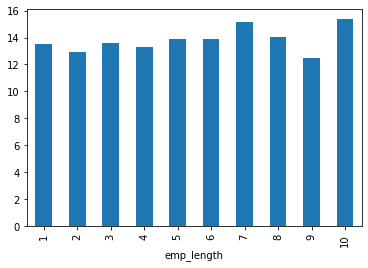

In [105]:
emp_length_risk.plot.bar()

In [106]:
emp_length_risk_score = round(100*(emp_length_risk.max() - emp_length_risk.min())/emp_length_risk.max(),2)
emp_length_risk_score

18.62

Analysing Home Ownership

In [107]:
loan.home_ownership.value_counts()

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

In [108]:
home_ownership_risk = 100*loan.groupby('home_ownership').loan_status.sum()/loan.groupby('home_ownership').loan_status.count()

In [109]:
home_ownership_risk

home_ownership
MORTGAGE    13.126552
OTHER       19.148936
OWN         13.812375
RENT        14.749487
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='home_ownership'>

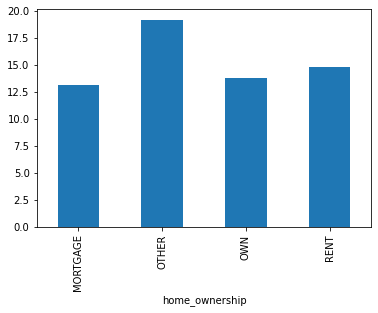

In [110]:
home_ownership_risk.plot.bar()

In [111]:
home_ownership_risk_score = round(100*(home_ownership_risk.max() - home_ownership_risk.min())/home_ownership_risk.max(),2)
home_ownership_risk_score

31.45

Analysing Annual Income

In [112]:
loan.annual_inc.describe()

count    3.536500e+04
mean     6.909774e+04
std      6.396843e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

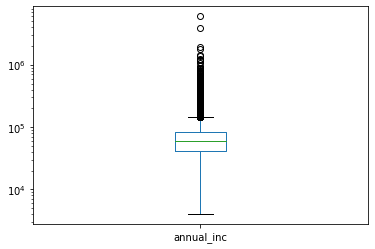

In [113]:
fig, ax = plt.subplots()
ax.set_yscale("log")

loan.annual_inc.plot.box()
plt.show()



In [114]:
((loan.annual_inc > 82500)).sum()

8828

There are 8828 applications >75 quartile value.

In [115]:
# Giving categorical value to range of annual income. Binning for analysis, as there are a lot of unique values

def annual_inc_convert(x):
    if x < 50000:
        return "low_inc"
    if ((x >= 50000) and (x<=80000)):
        return "med_inc"
    if x>80000:
        return "high_inc"

In [116]:
loan.annual_inc = loan.annual_inc.apply(annual_inc_convert)

In [117]:
loan.annual_inc.value_counts()

med_inc     13315
low_inc     12787
high_inc     9263
Name: annual_inc, dtype: int64

In [118]:
annual_inc_risk = 100*loan.groupby('annual_inc').loan_status.sum()/loan.groupby('annual_inc').loan_status.count()

In [119]:
annual_inc_risk.sort_values(ascending=False)

annual_inc
low_inc     16.344725
med_inc     13.879084
high_inc    10.838821
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

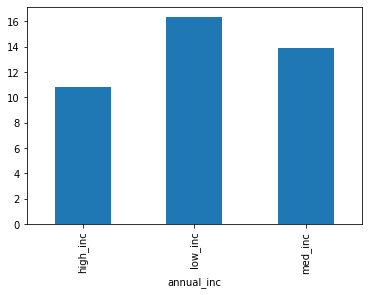

In [120]:
annual_inc_risk.plot.bar()

This suggests that as the income increases the loan risk decreases.
The risk of default is higher in applications woth higher incomes.

In [121]:
annual_inc_risk_score = round(100*(annual_inc_risk.max() - annual_inc_risk.min())/annual_inc_risk.max(),2)
annual_inc_risk_score

33.69

Analysing Verification Status

In [122]:
loan.verification_status.value_counts()

Not Verified       14838
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

In [123]:
loan.groupby('verification_status').loan_status.sum()

verification_status
Not Verified       1769
Source Verified    1322
Verified           1851
Name: loan_status, dtype: int64

In [124]:
verification_status_risk = (100*loan.groupby('verification_status').loan_status.sum()/loan.groupby('verification_status').loan_status.count()).sort_values(ascending=False)

In [125]:
verification_status_risk

verification_status
Verified           16.289712
Source Verified    14.426015
Not Verified       11.922092
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='verification_status'>

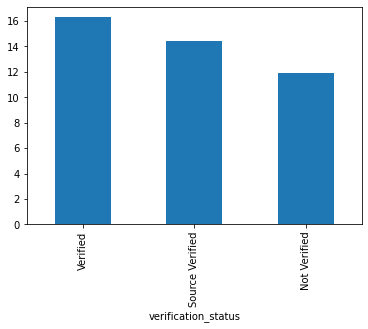

In [126]:
verification_status_risk.plot.bar()

In [127]:
verification_risk_score = round(100*(verification_status_risk.max() - verification_status_risk.min())/verification_status_risk.max(),2)
verification_risk_score

26.81

As Risk ratio we see that Verified applicants are riskier. Kind of counter intuitive, but that what data says!

Analysing dti

In [128]:
loan.dti.describe()

count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [129]:
# Giving categorical value to range of dti. Binning for analysis, as there are a lot of unique values

def dti_convert(x):
    if x < 10:
        return "low_dti"
    if ((x >= 10) and (x<=20)):
        return "med_dti"
    if x>20:
        return "high_dti"

In [130]:
loan.dti = loan.dti.apply(dti_convert)

In [131]:
loan.dti.value_counts()

med_dti     17095
low_dti     11531
high_dti     6739
Name: dti, dtype: int64

In [132]:
dti_risk = 100*loan.groupby('dti').loan_status.sum()/loan.groupby('dti').loan_status.count()

In [133]:
dti_risk.sort_values(ascending=False)

dti
high_dti    16.040956
med_dti     14.612460
low_dti     11.820310
Name: loan_status, dtype: float64

<AxesSubplot:>

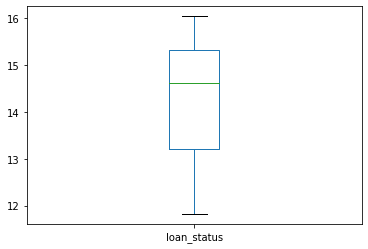

In [134]:
dti_risk.plot.box()

As the debt to income ratio increases default risk increases.

In [135]:
dti_risk_score = round(100*(dti_risk.max() - dti_risk.min())/dti_risk.max(),2)
dti_risk_score

26.31

### RIsk Score Analysis

Forming a dataframe for the variables analysed.

In [136]:
risk_scores = [purpose_risk_score,
                int_rate_risk_score,
                loan_amnt_risk_score,
                loan_term_risk_score,
                grade_risk_score,
                emp_length_risk_score,
                home_ownership_risk_score,
                annual_inc_risk_score,
                verification_risk_score,
                dti_risk_score]

In [137]:
indexes =      ["purpose",
                "int_rate",
                "loan_amnt",
                "term",
                "grade",
                "emp_length",
                "home_ownership",
                "annual_inc",
                "verification_status",
                "dti"]

In [138]:
r_max =      [purpose_risk.max(),
                int_rate_risk.max(),
                loan_amnt_risk.max(),
                loan_term_risk.max(),
                grade_risk.max(),
                emp_length_risk.max(),
                home_ownership_risk.max(),
                annual_inc_risk.max(),
                verification_status_risk.max(),
                dti_risk.max()]

In [139]:
r_min =      [purpose_risk.min(),
                int_rate_risk.min(),
                loan_amnt_risk.min(),
                loan_term_risk.min(),
                grade_risk.min(),
                emp_length_risk.min(),
                home_ownership_risk.min(),
                annual_inc_risk.min(),
                verification_status_risk.min(),
                dti_risk.min()]

In [140]:
univariate_factors = {
                      'risk_scores':risk_scores,
                      'indexes' : indexes,
                      'r_max' : r_max,
                      'r_min' : r_min
                     }

In [141]:
uni_df = pd.DataFrame(data=univariate_factors)

In [142]:
uni_df = uni_df.set_index('indexes')

In [143]:
uni_df = uni_df.sort_values(by='risk_scores',ascending=False)

In [144]:
uni_df['r_diff'] = uni_df.r_max - uni_df.r_min

In [145]:
uni_df

,risk_scores,r_max,r_min,r_diff
indexes,,,,
grade,95.07,46.464646,2.288557,44.176089
int_rate,73.02,32.000000,8.632131,23.367869
purpose,63.59,26.350851,9.595376,16.755475
term,57.97,24.616240,10.346919,14.269321
loan_amnt,35.82,19.653768,12.613688,7.040080
annual_inc,33.69,16.344725,10.838821,5.505904
home_ownership,31.45,19.148936,13.126552,6.022384
verification_status,26.81,16.289712,11.922092,4.367620
dti,26.31,16.040956,11.820310,4.220645


<AxesSubplot:>

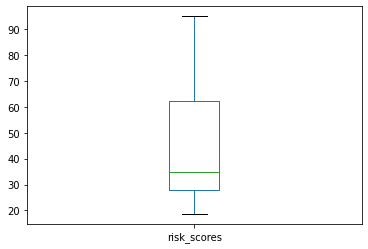

In [146]:
uni_df.risk_scores.plot.box()

<AxesSubplot:xlabel='risk_scores'>

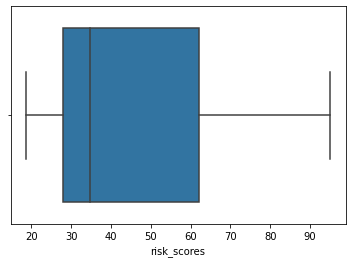

In [147]:
sns.boxplot(uni_df.risk_scores)

In [148]:
uni_df.describe()

,risk_scores,r_max,r_min,r_diff
count,10.000000,10.000000,10.000000,10.000000
mean,46.235000,23.226983,10.368445,12.858539
std,24.860879,9.815302,3.176865,12.865716
min,18.620000,15.360000,2.288557,2.860000
25%,27.970000,16.303465,9.783262,4.652191
50%,34.755000,19.401352,11.329566,6.531232
75%,62.185000,25.917198,12.355523,16.133937
max,95.070000,46.464646,13.126552,44.176089


From above we observe that:
1. mean > median.
2. high SD.
3. Greater dieefernce between higher quartile parameters than lower quartile parameter

Since we are factoring factors affecting the dafaule ratio most we will select the values greater than mean based on our above observation.<br>
These parameters would be **"grade"**, **"Interest Rate"**, **"Purpose"**, **"term"**.

### Bivariate Analysis

c_loan and n_loan are described in Data cleaning part.<br>
c_loan represents categorical attributes in original frame.<br>
n_loan represents numeric attributes in original data frame.<br>

In [149]:
c_loan.nunique()

term                       2
int_rate                 333
grade                      7
sub_grade                 35
emp_title              27412
emp_length                11
home_ownership             4
verification_status        3
issue_d                   51
loan_status                2
purpose                   14
title                  17660
addr_state                48
earliest_cr_line         509
revol_util              1081
last_pymnt_d              97
last_credit_pull_d        96
emp_years                 11
dtype: int64

On basis of uni-variate analysis and number of unique values of attributes dropping following:<br>
* term
* grade
* emp_length
* home_ownership
* verification_status
* loan_status
* purpose

In [150]:
drop_list = [ 'term',
            'grade',
            'emp_length',
            'home_ownership',
            'verification_status',
            'purpose']

In [151]:
c_loan.drop(drop_list,axis=1,inplace=True)

In [152]:
c_loan["int_rate"] = c_loan.int_rate.apply(lambda x: float(x[:-1]))

In [153]:
c_loan.int_rate = c_loan.int_rate.apply(int_rate_convert)

Plotting Numeric variable vs Categorical variables:

In [154]:
c_loan.head()

,int_rate,sub_grade,emp_title,issue_d,loan_status,title,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,emp_years
1,medium,C4,Ryder,Dec-11,Charged Off,bike,GA,Apr-99,9.40%,Apr-13,Sep-13,<
3,medium,C1,AIR RESOURCES BOARD,Dec-11,Fully Paid,personel,CA,Feb-96,21%,Jan-15,Apr-16,10+
5,low,A4,Veolia Transportaton,Dec-11,Fully Paid,My wedding loan I promise to pay back,AZ,Nov-04,28.30%,Jan-15,Jan-16,3
6,medium,C5,Southern Star Photography,Dec-11,Fully Paid,Loan,NC,Jul-05,85.60%,May-16,May-16,8
7,high,E1,MKC Accounting,Dec-11,Fully Paid,Car Downpayment,CA,Jan-07,87.50%,Jan-15,Dec-14,9


In [155]:
loan_2 = pd.concat([c_loan, n_loan], axis=1)

In [156]:
drop_list = ["id",
             "funded_amnt", 
             "funded_amnt_inv", 
             "installment", 
             "total_pymnt", 
             "total_pymnt_inv", 
             "total_rec_prncp", 
             "total_rec_int", 
             "member_id",
             "last_pymnt_amnt",
             "collection_recovery_fee",
             "recoveries", 
             "total_rec_late_fee",
             "revol_bal",
             ]

In [157]:
n_loan.drop(drop_list,axis=1,inplace=True)

In [158]:
n_loan.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
1,2500,30000.0,1.00,0,5,3,0,4,0.0
3,10000,49200.0,20.00,0,1,10,0,37,0.0
5,5000,36000.0,11.20,0,3,9,0,12,0.0
6,7000,47004.0,23.51,0,1,7,0,11,0.0
7,3000,48000.0,5.35,0,2,4,0,4,0.0


In [159]:
# number of rows in subplot with 3 coulmn

num_rows = math.ceil(len(n_loan.columns)*len(c_loan.columns)/3)

In [160]:
len(c_loan.columns)

12

In [161]:
num_rows

36

<Figure size 432x288 with 0 Axes>

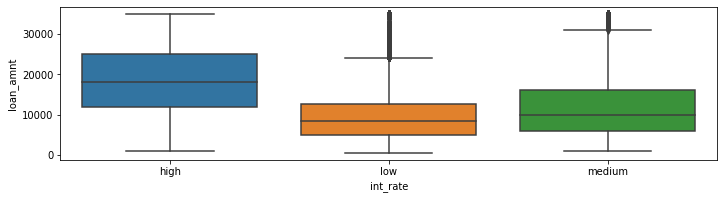

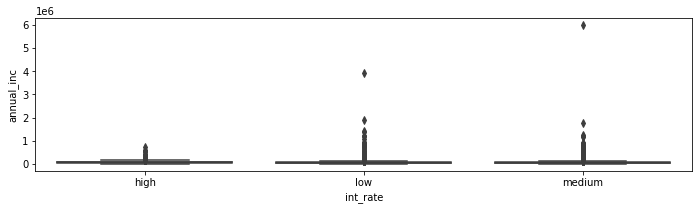

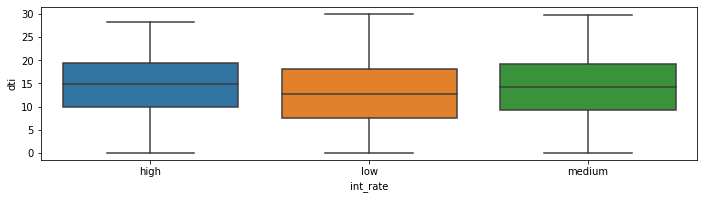

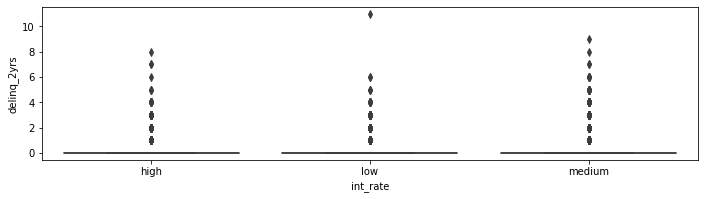

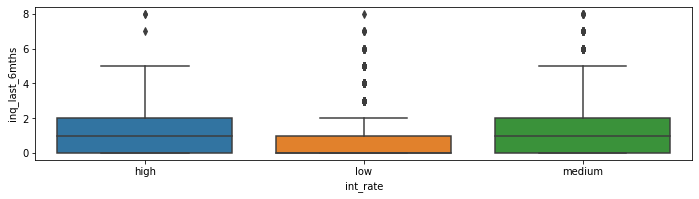

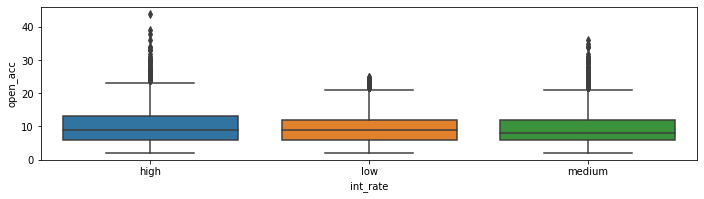

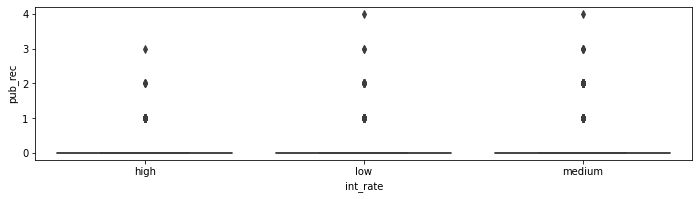

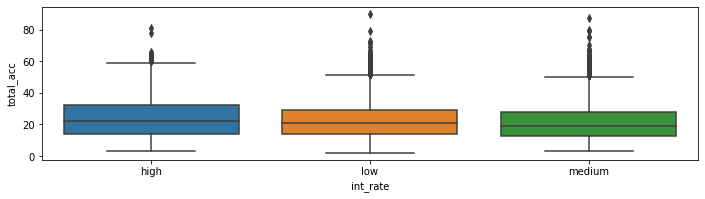

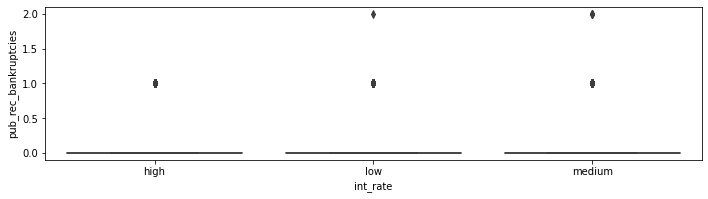

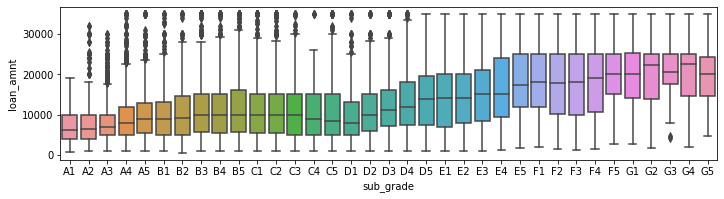

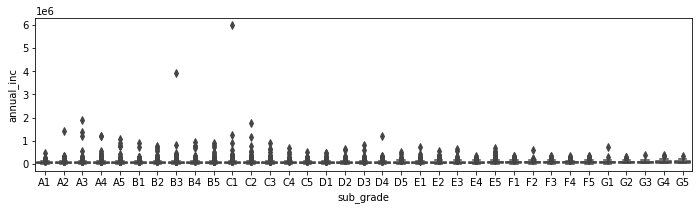

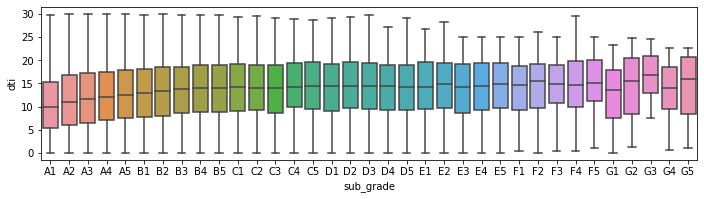

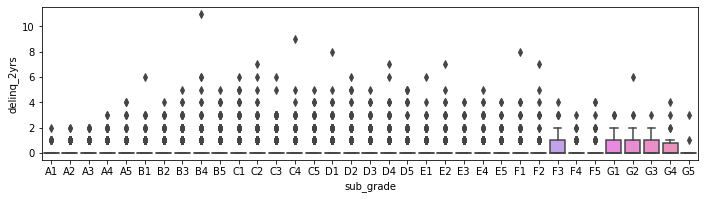

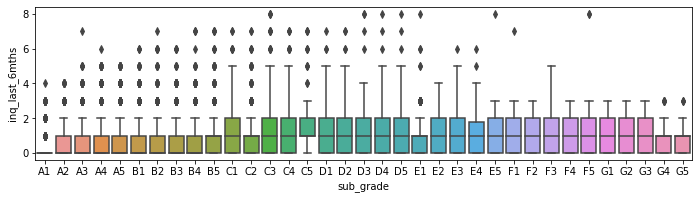

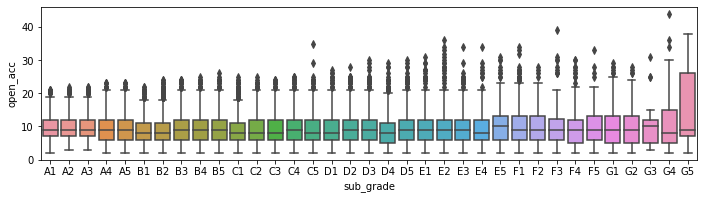

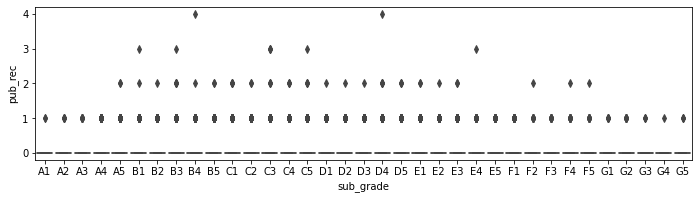

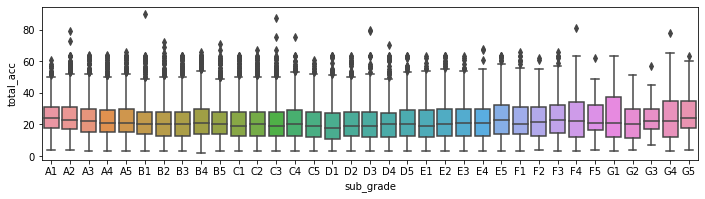

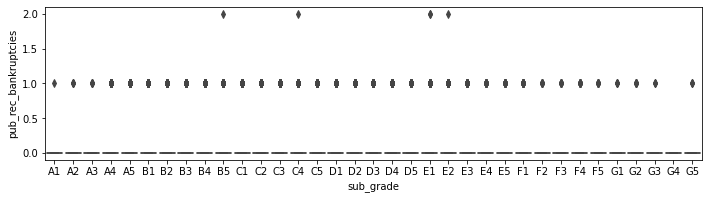

In [ ]:
#fig, axes = plt.subplots(num_rows, 3)
i=0 # an iterator;
#plt.figure(figsize=(7,7))
#sns.boxplot( x="int_rate", y="loan_amnt", data=loan_2)
#plt.show()
fig = plt.figure()
#fig = plt.figure(figsize=(40,40))
for x_val in c_loan:
    for y_val in n_loan:
        fig = plt.figure(figsize=(40,40))
        ax = fig.add_subplot(int(num_rows/3), 3, i+1)
        sns.boxplot( x=x_val, y=y_val, data=loan_2.sort_values(by=x_val))
        plt.show()
        i=i+1


In [ ]:
x_val